# Final Project: Customer Churn 

#### Author: Jacob Argue and John Cook
#### Completed: December 2018
#### Course: Business Econometrics II

## 1. Import Relevant Libararies

In [219]:
#Basic libraries
import numpy as np
import pandas as pd

#Train-test split library
from sklearn.model_selection import train_test_split

#Basic libraries for graphs
import matplotlib.pylab as plt
%matplotlib inline

#Libraries for decision boundary plots
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

## 2. Pre-Process Data

In [220]:
#Load customer churn data
telco_df = pd.read_csv('data/Churn.csv')

#Use dictionary to translate qualitative variables into dummies
dmy_dict = {"yes":1, "no":0}
churn_dict = {"False.":0, "True.":1}
telco_df.Churn = telco_df.Churn.replace(churn_dict)
telco_df.Intl_Plan = telco_df.Intl_Plan.replace(dmy_dict)
telco_df.Vmail_Plan = telco_df.Vmail_Plan.replace(dmy_dict)

#Declaring target and feature data
target_df = telco_df.Churn

In [221]:
telco_df.head()

,State,Account_Length,Area_Code,Phone,Intl_Plan,Vmail_Plan,Vmail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [222]:
telco_df.shape

(3333, 21)

In [223]:
telco_df.dtypes

State              object
Account_Length      int64
Area_Code           int64
Phone              object
Intl_Plan           int64
Vmail_Plan          int64
Vmail_Message       int64
Day_Mins          float64
Day_Calls           int64
Day_Charge        float64
Eve_Mins          float64
Eve_Calls           int64
Eve_Charge        float64
Night_Mins        float64
Night_Calls         int64
Night_Charge      float64
Intl_Mins         float64
Intl_Calls          int64
Intl_Charge       float64
CustServ_Calls      int64
Churn               int64
dtype: object

In [224]:
# Convert two-letter state codes into numbers
state_dict = {"AL":0,"AK":1, "AZ":2, "AR":3, "CA":4, "CO":5, "CT":6, "DE":7, "FL":8, "GA":9, "HI":10, "ID":11, "IL":12, "IN":13, "IA":14, "KS":15, "KY":16, "LA":17, "ME":18, "MD":19, "MA":20, "MI":21, "MN":22, "MS":23, "MO":24, "MT":25, "NE":26, "NV":27, "NH":28, "NJ":29, "NM":30, "NY":31, "NC":32, "ND":33, "OH":34, "OK":35, "OR":36, "PA":37, "RI":38, "SC":39, "SD":40, "TN":41, "TX":42, "UT":43, "VT":44, "VA":45, "WA":46, "WV":47, "WI":48, "WY":49, "DC":50}
telco_df.State = telco_df.State.replace(state_dict)

In [225]:
# Change State column datatype from object to int
telco_df['State'].astype(int)

0       15
1       34
2       29
3       34
4       35
5        0
6       20
7       24
8       17
9       47
10      13
11      38
12      14
13      25
14      14
15      31
16      11
17      44
18      45
19      42
20       8
21       5
22       2
23      39
24      45
25      26
26      49
27      25
28      24
29      10
        ..
3303    48
3304    12
3305    13
3306     0
3307    35
3308    14
3309    44
3310    31
3311    17
3312    39
3313    11
3314    24
3315    18
3316    23
3317    40
3318    35
3319    49
3320     9
3321    44
3322    19
3323    13
3324    47
3325    34
3326    34
3327    39
3328     2
3329    47
3330    38
3331     6
3332    41
Name: State, Length: 3333, dtype: int64

In [226]:
# Create Dummy Variables for each State

telco_df['AL'] = np.where(telco_df['State']!=0, 0, 1)
telco_df['AK'] = np.where(telco_df['State']!=1, 0, 1)
telco_df['AZ'] = np.where(telco_df['State']!=2, 0, 1)
telco_df['AR'] = np.where(telco_df['State']!=3, 0, 1)
telco_df['CA'] = np.where(telco_df['State']!=4, 0, 1)
telco_df['CO'] = np.where(telco_df['State']!=5, 0, 1)
telco_df['CT'] = np.where(telco_df['State']!=6, 0, 1)
telco_df['DE'] = np.where(telco_df['State']!=7, 0, 1)
telco_df['FL'] = np.where(telco_df['State']!=8, 0, 1)
telco_df['GA'] = np.where(telco_df['State']!=9, 0, 1)
telco_df['HI'] = np.where(telco_df['State']!=10, 0, 1)
telco_df['ID'] = np.where(telco_df['State']!=11, 0, 1)
telco_df['IL'] = np.where(telco_df['State']!=12, 0, 1)
telco_df['IN'] = np.where(telco_df['State']!=13, 0, 1)
telco_df['IA'] = np.where(telco_df['State']!=14, 0, 1)
telco_df['KS'] = np.where(telco_df['State']!=15, 0, 1)
telco_df['KY'] = np.where(telco_df['State']!=16, 0, 1)
telco_df['LA'] = np.where(telco_df['State']!=17, 0, 1)
telco_df['ME'] = np.where(telco_df['State']!=18, 0, 1)
telco_df['MD'] = np.where(telco_df['State']!=19, 0, 1)
telco_df['MA'] = np.where(telco_df['State']!=20, 0, 1)
telco_df['MI'] = np.where(telco_df['State']!=21, 0, 1)
telco_df['MN'] = np.where(telco_df['State']!=22, 0, 1)
telco_df['MS'] = np.where(telco_df['State']!=23, 0, 1)
telco_df['MO'] = np.where(telco_df['State']!=24, 0, 1)
telco_df['MT'] = np.where(telco_df['State']!=25, 0, 1)
telco_df['NE'] = np.where(telco_df['State']!=26, 0, 1)
telco_df['NV'] = np.where(telco_df['State']!=27, 0, 1)
telco_df['NH'] = np.where(telco_df['State']!=28, 0, 1)
telco_df['NJ'] = np.where(telco_df['State']!=29, 0, 1)
telco_df['NM'] = np.where(telco_df['State']!=30, 0, 1)
telco_df['NY'] = np.where(telco_df['State']!=31, 0, 1)
telco_df['NC'] = np.where(telco_df['State']!=32, 0, 1)
telco_df['ND'] = np.where(telco_df['State']!=33, 0, 1)
telco_df['OH'] = np.where(telco_df['State']!=34, 0, 1)
telco_df['OK'] = np.where(telco_df['State']!=35, 0, 1)
telco_df['OR'] = np.where(telco_df['State']!=36, 0, 1)
telco_df['PA'] = np.where(telco_df['State']!=37, 0, 1)
telco_df['RI'] = np.where(telco_df['State']!=38, 0, 1)
telco_df['SC'] = np.where(telco_df['State']!=39, 0, 1)
telco_df['SD'] = np.where(telco_df['State']!=40, 0, 1)
telco_df['TN'] = np.where(telco_df['State']!=41, 0, 1)
telco_df['TX'] = np.where(telco_df['State']!=42, 0, 1)
telco_df['UT'] = np.where(telco_df['State']!=43, 0, 1)
telco_df['VT'] = np.where(telco_df['State']!=44, 0, 1)
telco_df['VA'] = np.where(telco_df['State']!=45, 0, 1)
telco_df['WA'] = np.where(telco_df['State']!=46, 0, 1)
telco_df['WV'] = np.where(telco_df['State']!=47, 0, 1)
telco_df['WI'] = np.where(telco_df['State']!=48, 0, 1)
telco_df['WY'] = np.where(telco_df['State']!=49, 0, 1)
telco_df['DC'] = np.where(telco_df['State']!=50, 0, 1)

In [227]:
telco_df.Area_Code.unique()

array([415, 408, 510])

In [228]:
Area_Code_dict = {415:0, 408:1, 510:2}
telco_df.Area_Code = telco_df.Area_Code.replace(Area_Code_dict)

In [229]:
# Note: Area codes 415, 408, and 510 correspond to the Bay Area: San Francisco, San Jose, and Oakland, respectively.
telco_df['SanFran'] = np.where(telco_df['Area_Code']!=0, 0, 1)
telco_df['SanJose'] = np.where(telco_df['Area_Code']!=1, 0, 1)
telco_df['Oakland'] = np.where(telco_df['Area_Code']!=2, 0, 1)

In [230]:
# Drop Phone as it only contains the last 7 digits, which are random and will only contribute noise; 
# Drop State as it has been reorganized into dummy variables for each State; 
# Drop Area_Code as it has been reorganized into dummy variables;
# Drop Churn as it is the target variable and should stay separate from feature variables.
features_df = telco_df.drop(['Phone', 'State', 'Area_Code', 'Churn'], axis=1)

In [231]:
features_df.head()

,Account_Length,Intl_Plan,Vmail_Plan,Vmail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,...,VT,VA,WA,WV,WI,WY,DC,SanFran,SanJose,Oakland
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,1,0,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,1,0,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,1,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,0,1,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,1,0,0


In [232]:
churn_df = telco_df['Churn']

In [233]:
churn_df.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    0
13    0
14    0
15    1
16    0
17    0
18    0
19    0
Name: Churn, dtype: int64

# 3. Training Machine Learning Algorithms

In [234]:
#Loading train-test split library
from sklearn.model_selection import train_test_split

#Conducting train-test split
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.33, random_state=23)

In [235]:
#Loading Cross-validation and Hyperparameter optimization libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

## Logit

In [236]:
#Set k fold parameters, including number of k folds and randomization
crossv = KFold(n_splits=3, shuffle=True, random_state=4973)

#Set model to be trained and cross validated
Lasso_mod = linear_model.Lasso()

#Calculate scores for lasso
cv_scores = cross_val_score(Lasso_mod, features_df, churn_df, cv = crossv, scoring='r2')

print('LASSO parameters', Lasso_mod)
print('R-sq for each fold are:', cv_scores)
print('Average R-sq, across folds:', np.mean(cv_scores))
print('Std R-sq, across folds:', np.std(cv_scores))

LASSO parameters Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
R-sq for each fold are: [0.04068242 0.04848447 0.03992778]
Average R-sq, across folds: 0.04303155943731859
Std R-sq, across folds: 0.00386807815189561


In [237]:
#Setting up the grid of possible parameter values for alpha
alpha_range = np.linspace(0.001, 10, 100)

#Defining grid search
gscv_model = GridSearchCV(Lasso_mod, dict(alpha=alpha_range), cv=3, refit=True, scoring='r2')
gscv_result = gscv_model.fit(X_train, y_train)

#Report results
print(gscv_result.best_estimator_)
print('The optimal penalty parameter is:', gscv_result.best_params_)
print('Cross-validated R-squared:', gscv_result.best_score_)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
The optimal penalty parameter is: {'alpha': 0.001}
Cross-validated R-squared: 0.15470829693057925


In [238]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [239]:
train_scores, test_scores = validation_curve(Lasso_mod, features_df, churn_df, param_range=alpha_range, param_name="alpha", cv=3, scoring='r2')

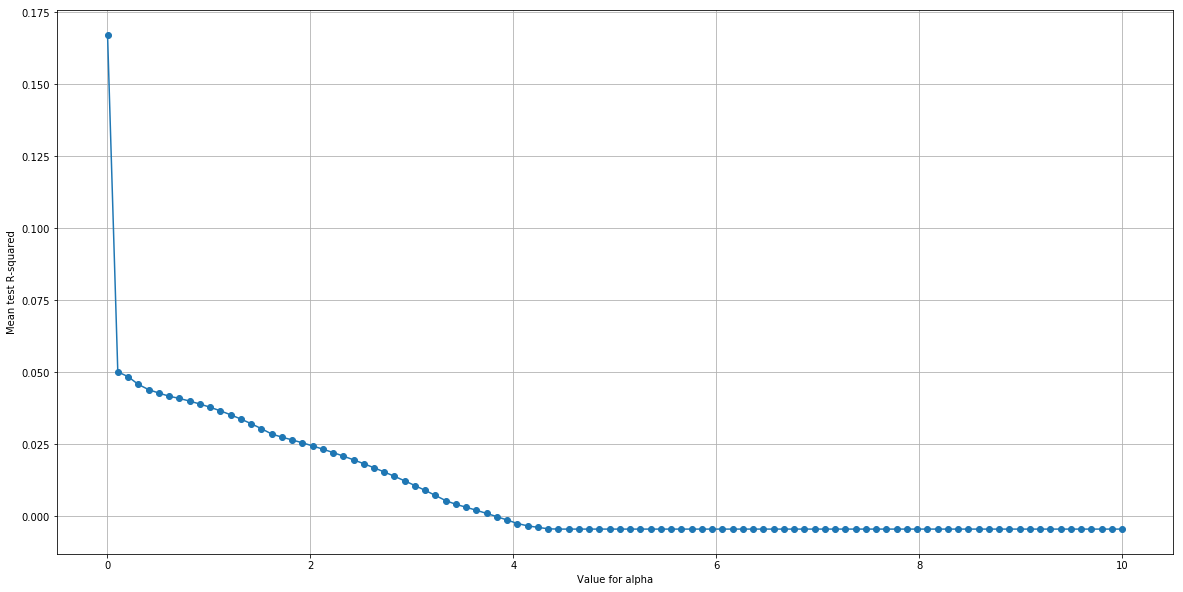

In [240]:
#Outcomes of interest
mean_test = np.mean(test_scores, axis=1)

#plot
plt.figure(figsize=(20,10))
plt.plot(alpha_range, mean_test, 'o-', label="Cross-validation")
plt.grid()
plt.xlabel('Value for alpha')
plt.ylabel('Mean test R-squared')
plt.show()

This essentially shows that an alpha value of '0', or non-regularized lasso, is the best.

### Computing ROC and AUC

In [241]:
#Calculate False-Positive and True Positive Rates
fpr_logit, tpr_logit, _ = roc_curve(y_test, y_score_logit[:,1])

#AUC
roc_auc_logit = auc(fpr_logit, tpr_logit)

## Decision Tree

In [242]:
from sklearn import tree

In [243]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [244]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8238610038610038

#### Max Depth optimization

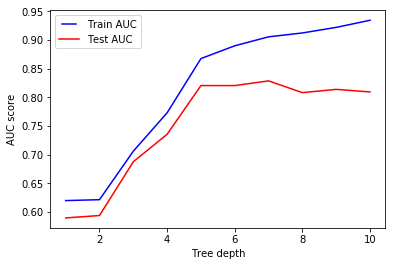

In [245]:
max_depths = np.linspace(1, 10, 10, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, color='blue', label='Train AUC')
line2, = plt.plot(max_depths, test_results, color='red', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

The ideal tree depth appears to be 5. After that point there is overfitting. 

#### min_samples_split optimization

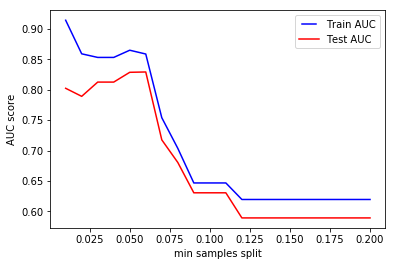

In [246]:
min_samples_splits = np.linspace(0.01, 0.2, 20, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'B', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'R', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

The ideal minimum percentage of the sample that should be considered is .7%; less than this and there is overfitting, and more than this there is a rapid decline in AUC accuracy. 

### Calculating Decision Tree with optimized values

In [247]:
dt1 = DecisionTreeClassifier(criterion='entropy', max_depth= 5, min_samples_split=.07)
dt1.fit(X_train, y_train)
y_pred = dt1.predict(X_test)
dt1

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.07,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Graphing Decision tree

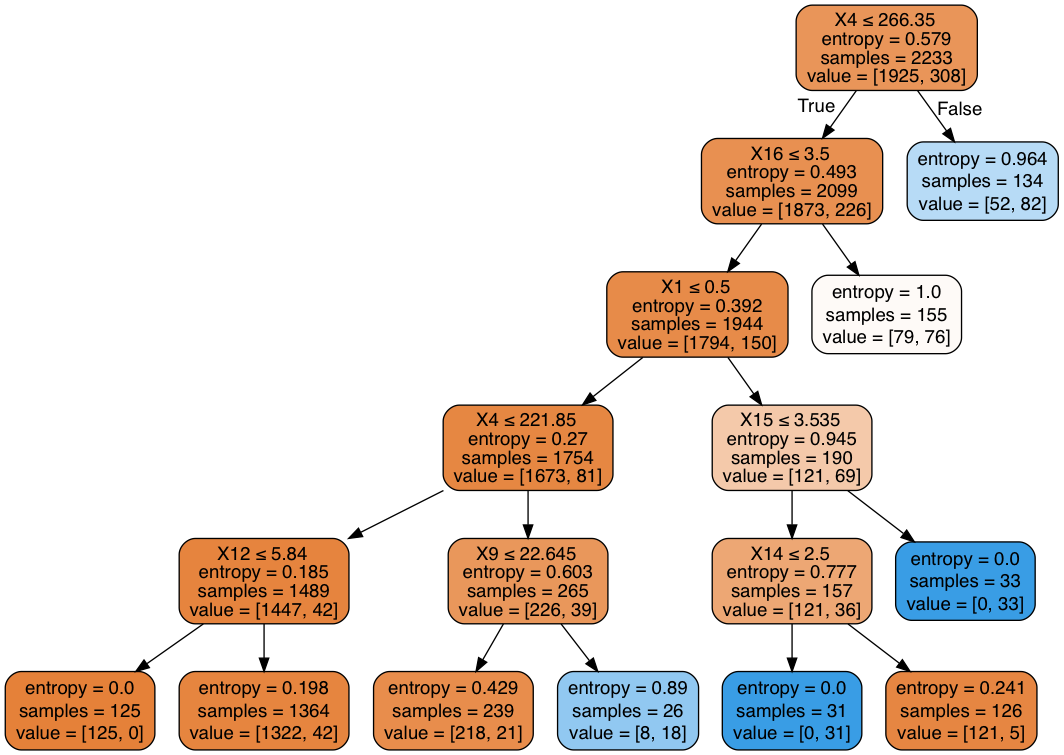

In [248]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dt1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Computing ROC and AUC

In [249]:
#Calculate False-Positive and True Positive Rates
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_score_dtc[:,1])

#AUC
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)

## Bagging Classifier

In [250]:
from sklearn import ensemble

In [251]:
#Step 1: designate algorithm
bagc0 = ensemble.BaggingClassifier(random_state=42)

#Step 2: fit model on training data
bagc_fit0 = bagc0.fit(X_train, y_train)

#Step 2A: display parameters used
print(bagc_fit0)

#Step 3: 
y_score_bagc = bagc_fit0.predict_proba(X_test)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
         verbose=0, warm_start=False)


In [252]:
print('Accuracy for Bagging Classifier', bagc_fit0.score(X_test, y_test))

Accuracy for Bagging Classifier 0.9427272727272727


In [253]:
y_pred0 = bagc_fit0.predict(X_test)
cmatrix0 = confusion_matrix(y_test, y_pred0)
df_cm = pd.DataFrame(cmatrix0, index=['Churn (true)', 'Stay (true)'], columns=['Churn (pred)', 'Stay (pred)'])
df_cm

,Churn (pred),Stay (pred)
Churn (true),917,8
Stay (true),55,120


### K-Fold Cross-Validation

In [254]:
#Set k fold parameters, including number of k folds and randomization
crossv = KFold(n_splits=10, shuffle=True, random_state=4973)

#Calculate scores for decision tree
cv_scores = cross_val_score(bagc0, features_df, target_df,cv = crossv, scoring='accuracy')

print('Decision Tree parameters', bagc0)
print('Accuracy for each fold are:', cv_scores)
print('Average accuracy, across folds:', np.mean(cv_scores))
print('Std accuracy, across folds:', np.std(cv_scores))

Decision Tree parameters BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
         verbose=0, warm_start=False)
Accuracy for each fold are: [0.94311377 0.95508982 0.93712575 0.94594595 0.95495495 0.93993994
 0.94294294 0.92492492 0.96396396 0.95795796]
Average accuracy, across folds: 0.9465959971947997
Std accuracy, across folds: 0.010964830011384737


### Computing ROC and AUC

In [255]:
#Calculate False-Positive and True Positive Rates
fpr_bagc, tpr_bagc, _ = roc_curve(y_test, y_score_bagc[:,1])

#AUC
roc_auc_bagc = auc(fpr_bagc, tpr_bagc)

## Random Forest

In [256]:
#Step 1: designate algorithm
rfc0 = ensemble.RandomForestClassifier(random_state=42, criterion='entropy')

#Step 2: fit model on training data
rfc_fit0 = rfc0.fit(X_train, y_train)

#Step 2A: display parameters used
print(rfc_fit0)

#Step 3: 
y_score_rfc = rfc_fit0.predict_proba(X_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


### Computing ROC and AUC

In [257]:
#Calculate False-Positive and True Positive Rates
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_score_rfc[:,1])

#AUC
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

## k-Nearest Neighbor Classifiers

In [258]:
from sklearn import neighbors

#Step 1: designate algorithm
kNNc0 = neighbors.KNeighborsClassifier(weights='uniform', algorithm='brute', p=2)

#Step 2: fit model on training data
kNNc_fit0 = kNNc0.fit(X_train, y_train)

#Step 2A: display parameters used
print(kNNc_fit0)

#Step 3: 
y_score_kNNc = kNNc_fit0.predict_proba(X_test)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [259]:
print('Accuracy for kNN Classifier', kNNc_fit0.score(X_test, y_test))

Accuracy for kNN Classifier 0.8663636363636363


In [260]:
from sklearn.metrics import confusion_matrix

In [261]:
y_pred0 = kNNc_fit0.predict(X_test)
cmatrix0 = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cmatrix0, index=['Churn (true)', 'Stay (true)'], columns=['Churn (pred)', 'Stay (pred)'])
df_cm

,Churn (pred),Stay (pred)
Churn (true),897,28
Stay (true),93,82


### K-Fold Cross Validation

In [262]:
#Set k fold parameters, including number of k folds and randomization
crossv = KFold(n_splits=10, shuffle=True, random_state=4973)

#Calculate scores for decision tree
cv_scores = cross_val_score(kNNc0, features_df, target_df,cv = crossv, scoring='accuracy')

print('Decision Tree parameters', kNNc0)
print('Accuracy for each fold are:', cv_scores)
print('Average accuracy, across folds:', np.mean(cv_scores))
print('Std accuracy, across folds:', np.std(cv_scores))

Decision Tree parameters KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Accuracy for each fold are: [0.88323353 0.86526946 0.84431138 0.90990991 0.9009009  0.88588589
 0.88888889 0.84684685 0.84984985 0.9009009 ]
Average accuracy, across folds: 0.8775997554440668
Std accuracy, across folds: 0.02309464810551129


### Computing ROC and AUC

In [263]:
#Calculate False-Positive and True Positive Rates
fpr_kNNc, tpr_kNNc, _ = roc_curve(y_test, y_score_kNNc[:,1])

#AUC
roc_auc_kNNc = auc(fpr_kNNc, tpr_kNNc)

## 4. Comparing the Models

In [264]:
# Reciever Operating Characteristic (ROC) Curves is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.
from sklearn.metrics import roc_curve, auc

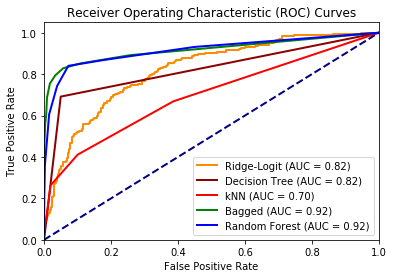

In [265]:
plt.figure()
plt.plot(fpr_logit, tpr_logit, color='darkorange',lw=2 ,label='Ridge-Logit (AUC = %0.2f)' % roc_auc_logit)
plt.plot(fpr_dtc, tpr_dtc, color='darkred',lw=2 ,label='Decision Tree (AUC = %0.2f)' % roc_auc_dtc)
plt.plot(fpr_kNNc, tpr_kNNc, color='red',lw=2 ,label='kNN (AUC = %0.2f)' % roc_auc_kNNc)
plt.plot(fpr_bagc, tpr_bagc, color='green',lw=2 ,label='Bagged (AUC = %0.2f)' % roc_auc_bagc)
plt.plot(fpr_rfc, tpr_rfc, color='blue',lw=2 ,label='Random Forest (AUC = %0.2f)' % roc_auc_rfc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

In [266]:
import scikitplot as skplt

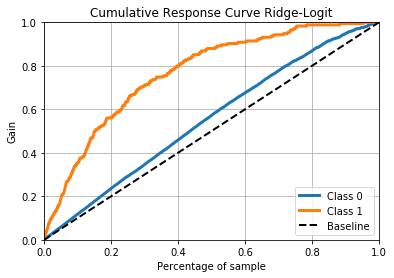

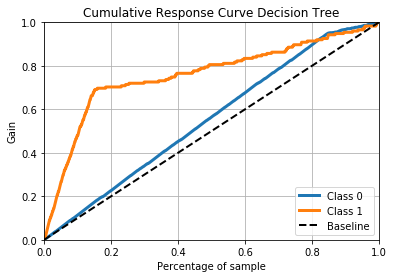

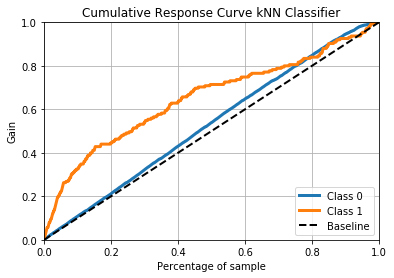

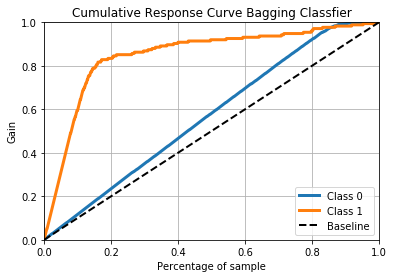

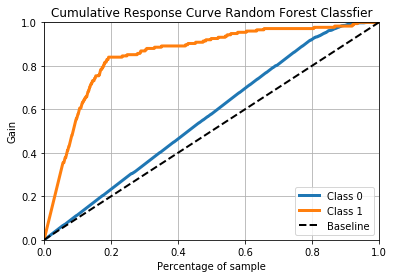

In [267]:
skplt.metrics.plot_cumulative_gain(y_test, y_score_logit)
plt.title('Cumulative Response Curve Ridge-Logit')
plt.show()

skplt.metrics.plot_cumulative_gain(y_test, y_score_dtc)
plt.title('Cumulative Response Curve Decision Tree')
plt.show()

skplt.metrics.plot_cumulative_gain(y_test, y_score_kNNc)
plt.title('Cumulative Response Curve kNN Classifier')
plt.show()

skplt.metrics.plot_cumulative_gain(y_test, y_score_bagc)
plt.title('Cumulative Response Curve Bagging Classfier')
plt.show()

skplt.metrics.plot_cumulative_gain(y_test, y_score_rfc)
plt.title('Cumulative Response Curve Random Forest Classfier')
plt.show()

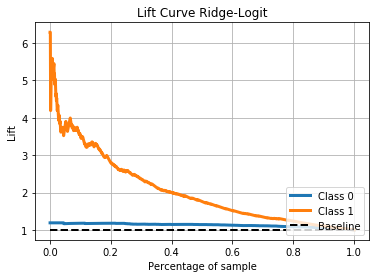

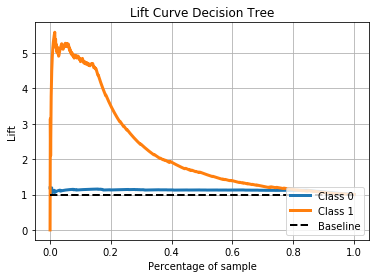

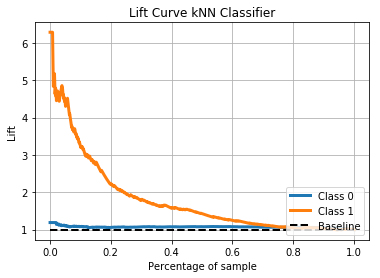

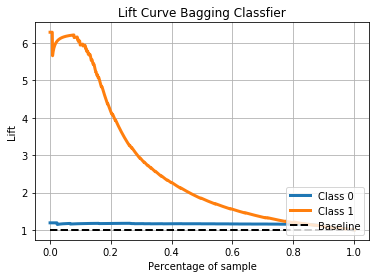

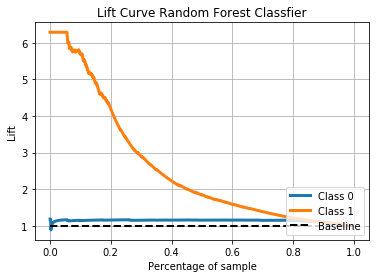

In [268]:
skplt.metrics.plot_lift_curve(y_test, y_score_logit)
plt.title('Lift Curve Ridge-Logit')
plt.show()

skplt.metrics.plot_lift_curve(y_test, y_score_dtc)
plt.title('Lift Curve Decision Tree')
plt.show()

skplt.metrics.plot_lift_curve(y_test, y_score_kNNc)
plt.title('Lift Curve kNN Classifier')
plt.show()

skplt.metrics.plot_lift_curve(y_test, y_score_bagc)
plt.title('Lift Curve Bagging Classfier')
plt.show()

skplt.metrics.plot_lift_curve(y_test, y_score_rfc)
plt.title('Lift Curve Random Forest Classfier')
plt.show()

## 5. Profit Curves

Lifetime value of a Verizon customer in 2005 (the most recent date data is available) is $2,589. Due to inflation and growth, I will round that to $3,000. 

True Positives we predict to churn and they do churn; True Negatives we predict to stay and they stay.
False Positives we predict to churn and they stay; False Negatives we predict to stay and they churn.

The profit impact of prediction varies by which area in the confusion matrix a given observation is. 

In [269]:
from sklearn.metrics import confusion_matrix

def standard_confusion_matrix(y_true, y_pred):
    #Reformat confusion matrix output from sklearn for plotting profit curve.
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_pred)
    return np.array([[tp, fp], [fn, tn]])

#### Profit Cost-Benefit Matrix

In [270]:
# Cost-benefit matrix with best guesses
profit_TP = 500 # I assume that of the customers who are predicted to churn, we can get one-sixth of them to stay through targeted promotions, etc.
profit_FP = -300 # The cost of giving customers who were going to stay anyway 10% discount, for example
profit_FN = -3000 # The customers we thought would stay but did not: negative lifetime value of a customer
profit_TN = 3000 # Lifetime value of a customer

costbenefit_mat = np.array([[profit_TP, profit_FP],
                            [profit_FN, profit_TN]])

In [271]:
def plot_profit_curve(model_label, costbenefit_mat, y_proba, y_test, col):
    '''
    Plot profit curve.
    
    INPUTS:
    - model label
    - cost benefit matrix in the same format as the confusion matrix
    - predicted probabilities on test data
    - actual test data
    - colors
    ''' 

    # Profit curve data
    profits = [] # one profit value for each T (threshold)
    thresholds = sorted(y_proba, reverse=True)
    
    # For each threshold, calculate profit - starting with largest threshold
    for T in thresholds:
        y_pred = (y_proba > T).astype(int)
        confusion_mat = standard_confusion_matrix(y_test, y_pred)
        # Calculate total profit for this threshold
        profit = sum(sum(confusion_mat * costbenefit_mat)) / len(y_test)
        profits.append(profit)    
    
    # Profit curve plot
    max_profit = round(max(profits), 2)
    plt.plot(np.linspace(0, 1, len(y_test)), profits, color=col, linewidth=3, label = '{}, max profit ${} per customer'.format(model_label, max_profit))
    

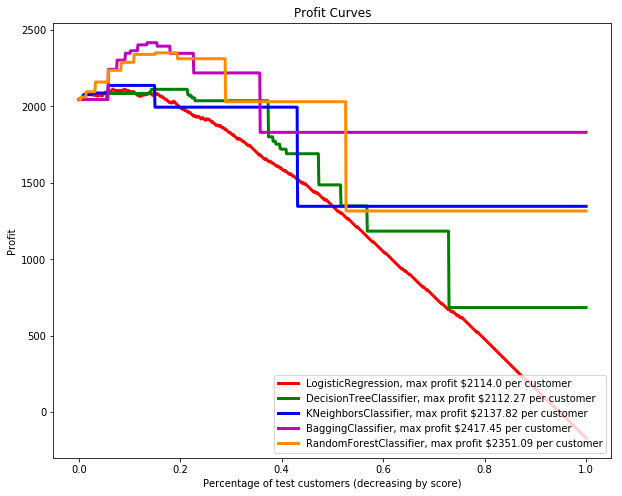

In [272]:
models = [logitC, dt, kNNc0, bagc0, rfc0]
fig = plt.figure(figsize=(10,8))
# fig.set_facecolor('#F2F2F2')
colors = ['r', 'g', 'b', 'm', 'darkorange']
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:,1]
    plot_profit_curve(model.__class__.__name__, costbenefit_mat, y_score, y_test, colors[i])

plt.title("Profit Curves")
plt.xlabel("Percentage of test customers (decreasing by score)")
plt.ylabel("Profit")
plt.legend(loc='lower right')
plt.savefig('Profit_curve.png', facecolor=fig.get_facecolor())
plt.show()

Now that we know that the Bagging Classifier is the best algorithm for this dataset, let's see how total profitability is affected. At the maximum, profit per customer is 2417.25 and if we were to expand this to the entire dataset of 3333 customers, this results in 8,056,694.25 more profit. This is as compared with 7,836,182.97 for Random Forest, 7,498,050.12 for Decision Tree, 7,125,354.06 for K-Nearest Neighbors, and 7,045,962.00 for Logistic Regression.